<a href="https://colab.research.google.com/github/KarinaEranosyan/KarinaEranosyan/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_python_pandas_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns

Часть 1: Первичный анализ данных (Pandas)
Загрузка данных: Загрузите датасет "titanic" из библиотеки seaborn. df = sns.load_dataset('titanic')

In [6]:
df = sns.load_dataset('titanic')

Обзор данных: Выведите первые 10 строк датасета. Выведите основную информацию о датасете (размер, типы данных, пропущенные значения).



In [7]:
df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Описательная статистика: Выведите описательную статистику для числовых колонок.


In [8]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Анализ пропусков: Определите, в каких колонках и сколько пропущенных значений. Предложите стратегию заполнения пропусков для колонки age (заполните медианным значением) и для колонки embarked (заполните самым частым значением — модой). Реализуйте это.


In [9]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [10]:
df['age']

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [12]:
median_age = round(df['age'].median(), 0)
df['age'].fillna(median_age, inplace=True)

In [38]:
mode_embraked = df['embarked'].mode()
df['embarked'].fillna(mode_embraked, inplace=True)

Новый признак: Создайте новый признак family_size, который будет равен сумме колонок sibsp (братья/сестры/супруги) и parch (дети/родители). Создайте еще один признак is_alone, который будет равен 1, если family_size равен 0, и 0 в противном случае.



In [15]:
df['family_size'] = df['sibsp'] + df['parch']

In [16]:
df['is_alone'] = (df['family_size'] == 0).astype(int)

Часть 2: Анализ и визуализация (Pandas, Matplotlib, Seaborn)

Используйте как matplotlib.pyplot, так и seaborn для создания визуализаций. Подписывайте оси и давайте графикам осмысленные названия.

In [17]:
import matplotlib.pyplot as plt

Выживаемость:

Постройте счетчик (count plot) для колонки survived. Сколько людей выжило и сколько погибло?

Постройте счетчик выживаемости с разбивкой по полу (sex). Какой пол имел более высокие шансы на выживание?


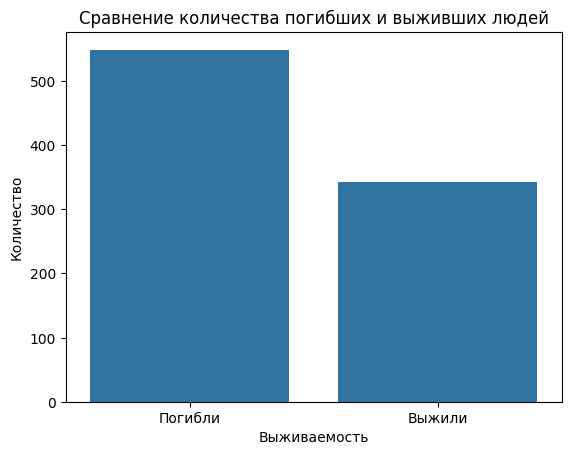

In [40]:
sns.countplot(df, x ='survived', stat= 'count')
plt.xlabel('Выживаемость')
plt.ylabel('Количество')
plt.xticks([0,1], ['Погибли', 'Выжили'])
plt.title('Сравнение количества погибших и выживших пассажиров')
plt.show()

Распределение возрастов:

Постройте гистограмму распределения возраста (age) пассажиров.

Постройте такой же график, но с разбивкой по выжившим и погибшим (например, использу kdeplot с hue='survived').

Text(0.5, 1.0, 'Распределение пассажиров по возрасту')

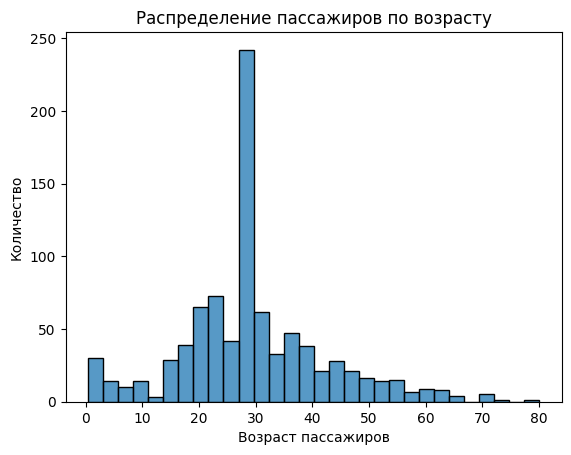

In [41]:
import matplotlib.pyplot as plt

sns.histplot(df, x = 'age')
plt.xlabel('Возраст пассажиров')
plt.ylabel('Количество')
plt.title('Распределение пассажиров по возрасту')

Text(0.5, 1.0, 'Распределение возраста пассажиров по группам выживших и погибших')

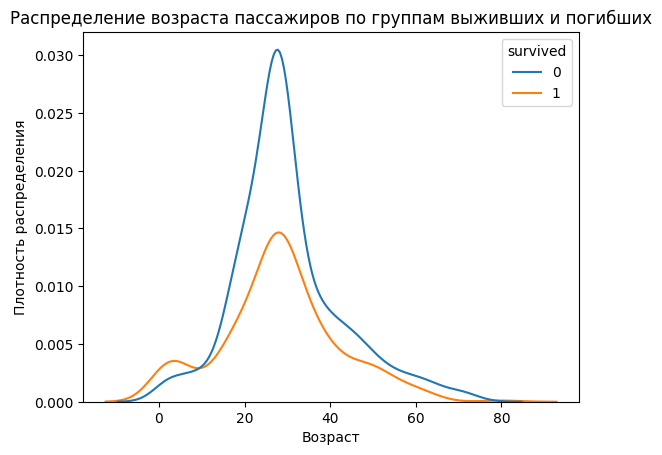

In [42]:
sns.kdeplot(df, x='age', hue = 'survived')
plt.xlabel('Возраст')
plt.ylabel('Плотность распределения')
plt.title('Распределение возраста пассажиров по группам выживших и погибших')

Влияние класса каюты:

Посчитайте сводную таблицу (pivot table), показывающую среднюю выживаемость в зависимости от класса каюты (pclass) и пола (sex).

Постройте heatmap на основе этой сводной таблицы.


In [23]:
pivot_survived_pclass_sex = pd.pivot_table(df, 'survived', index = 'pclass', columns = 'sex', aggfunc = 'mean')

Text(0.5, 1.0, 'Шансы на выживание в зависимости от пола и класса каюты')

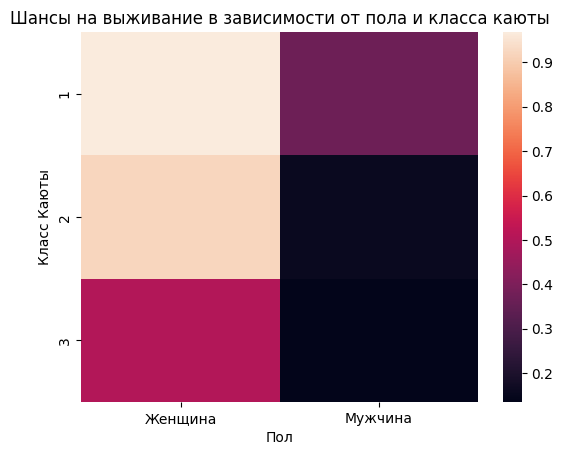

In [43]:
heatmap = sns.heatmap(pivot_survived_pclass_sex)
plt.xlabel('Пол')
heatmap.set_xticklabels(['Женщина', 'Мужчина'])
plt.ylabel('Класс Каюты')
plt.title('Шансы на выживание в зависимости от пола и класса каюты')

Стоимость билета и класс:

Постройте boxplot для распределения стоимости билета (fare) в зависимости от класса каюты (pclass).


Text(0.5, 1.0, 'Разброс стоимости билетов в зависимости от класса каюты')

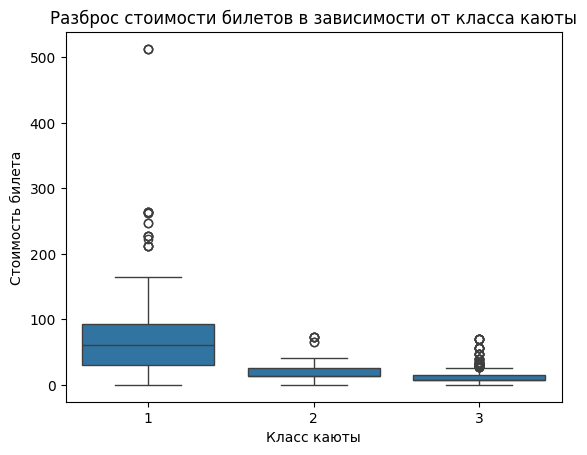

In [45]:
sns.boxplot(df, x = 'pclass', y = 'fare')
plt.ylabel('Стоимость билета')
plt.xlabel('Класс каюты')
plt.title('Разброс стоимости билетов в зависимости от класса каюты')

Анализ новых признаков:

Постройте барплот, показывающий среднюю выживаемость в зависимости от размера семьи (family_size).


Text(0.5, 1.0, 'Средняя выживаемость пассажиров в зависимости от количества членов семьи')

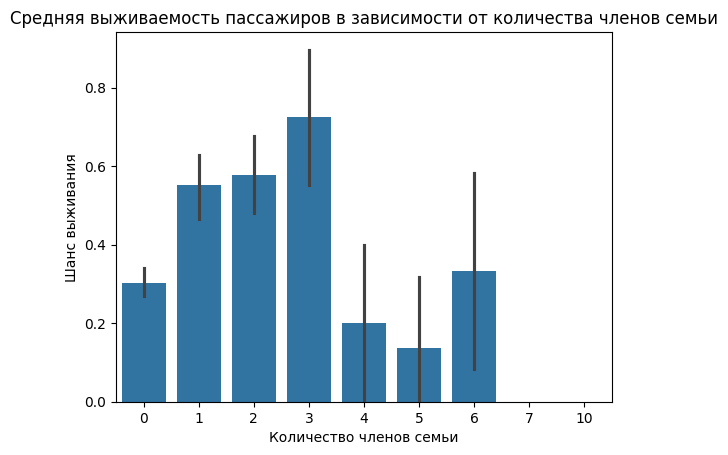

In [48]:
sns.barplot(df, x='family_size', y='survived')
plt.xlabel('Количество членов семьи')
plt.ylabel('Шанс выживания')
plt.title('Средняя выживаемость пассажиров в зависимости от количества членов семьи')

Часть 3: Формулировка выводов
На основе проведенного анализа и построенных графиков сформулируйте 3-5 ключевых выводов. Например:

"Пассажиры какого пола/класса имели наибольшие шансы на выживание?"

"Влиял ли возраст на выживаемость?"

"Было ли преимущество у пассажиров, путешествующих в одиночку, или у тех, у кого была семья?"

1. На «Титанике» людей погибло больше, чем спаслось — это хорошо видно на графике с количеством выживших.

2. Основная часть пассажиров была в возрасте от 20 до 40 лет. Прямой связи между возрастом и шансами выжить я не заметила, но маленьких детей, особенно до 10 лет, спасли чаще. Важно помнить, что я подставляла медианный возраст, поэтому тут возможны погрешности.

3. Самые большие шансы на выживание были у женщин из первого класса. Мужчины и пассажиры третьего класса чаще всего оказывались среди погибших.

4. Билеты первого класса были намного дороже, чем билеты во втором и третьем классе (это видно на графике boxplot: стоимость для первого класса сильно выше остальных). При этом, именно пассажиры первого класса чаще спасались, особенно женщины. Получается, дорогой билет давал не только комфорт, но и намного больше шансов на спасение в катастрофе.

5. Люди с небольшой семьёй (от 1 до 3 человек) выживали чаще, чем одиночки или большие семьи. Возможно, большие семьи предпочитали быть вместе до конца, но это только догадка.


